In [1]:
#some uses could be analyzing the average price of Airbnb listings in different neighborhoods in New York City and identifying the neighborhoods with the highest and lowest prices. the data could be used to study the occupancy of Airbnb listings in different neighborhoods in New York City and the seasonal trends in these occupancy rates to find which neighborhoofs are in demand during different seasons

<AxesSubplot:>

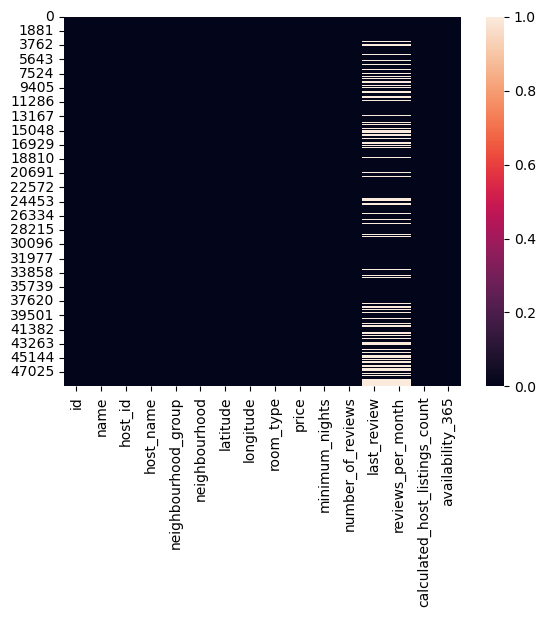

In [2]:
import seaborn as sns
import pandas as pd

df = pd.read_csv("airbnb-nyc.csv")

cols = df.columns
sns.heatmap(df[cols].isnull())

In [3]:
df["last_review"] = df["last_review"].fillna("None")

<AxesSubplot:>

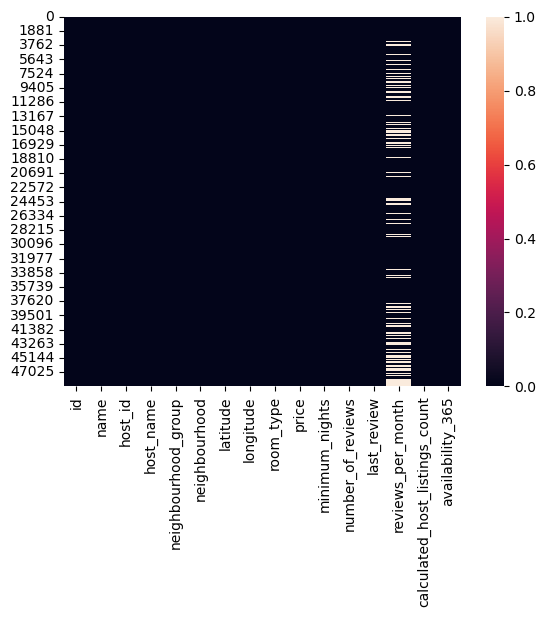

In [4]:
cols = df.columns
sns.heatmap(df[cols].isnull())

In [5]:
df["reviews_per_month"] = df["reviews_per_month"].fillna("None")

<AxesSubplot:>

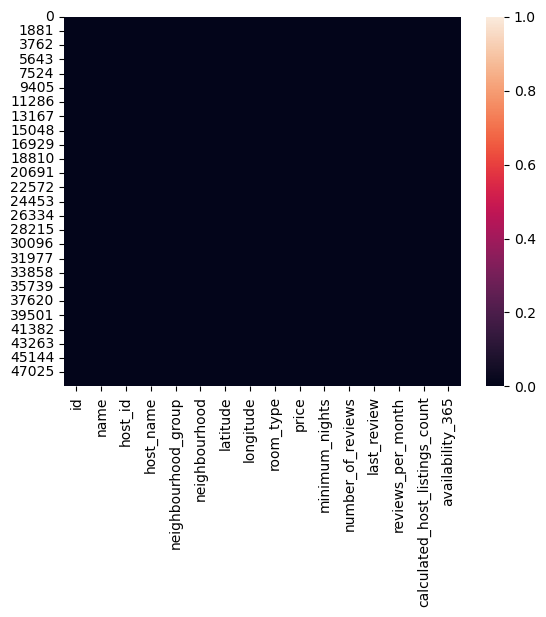

In [6]:
cols = df.columns
sns.heatmap(df[cols].isnull())

In [7]:
df.last_review = df.last_review.str[0:4] 
df.last_review

0        2018
1        2019
2        None
3        2019
4        2018
         ... 
48890    None
48891    None
48892    None
48893    None
48894    None
Name: last_review, Length: 48895, dtype: object

In [8]:
df['price_per_year'] = df['price'] * 365
df
#here is the final funciton of my choosing, which added a collumn that tells you how much it would cost to stay at said air bnb for a year

In [30]:
import requests

CLIENT_ID = '07005604eeb94c15a4b055cb290847f8'
CLIENT_SECRET = '24690934174c407583a9410363206c14'
BASE_URL = 'https://api.spotify.com/v1'


def get_access_token():
    response = requests.post('https://accounts.spotify.com/api/token', 
                             data={'grant_type': 'client_credentials'}, 
                             auth=(CLIENT_ID, CLIENT_SECRET))
    response_data = response.json()
    access_token = response_data.get('access_token')
    return access_token


def search_artists(query):
    access_token = get_access_token()
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'q': query, 'type': 'artist', 'limit': 5}
    response = requests.get(f'{BASE_URL}/search', headers=headers, params=params)
    response_data = response.json()
    artists = response_data.get('artists').get('items')
    return artists


def get_artist_albums(artist_id):
    access_token = get_access_token()
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(f'{BASE_URL}/artists/{artist_id}/albums', headers=headers)
    response_data = response.json()
    albums = response_data.get('items')
    return albums

def get_album_tracks(album_id):
    access_token = get_access_token()
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(f'{BASE_URL}/albums/{album_id}/tracks', headers=headers)
    response_data = response.json()
    tracks = response_data
    return tracks


def get_track_audio_features(track_id):
    access_token = get_access_token()
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(f'{BASE_URL}/audio-features/{track_id}', headers=headers)
    response_data = response.json()
    audio_features = response_data
    return audio_features
